# Robyn: Marketing Mix Modeling Application

This notebook demonstrates the usage of Robyn, a Marketing Mix Modeling (MMM) application. We'll go through the main steps of initializing the model, running it, and performing budget allocation.



## 1. Import Required Libraries and Create Synthetic Data

First, let's import the necessary libraries and create some synthetic data for our demonstration.

In [1]:
import sys

sys.path.append("/Users/yijuilee/robynpy_release_reviews/Robyn/python/src")
import pandas as pd
from robyn.robyn import Robyn
from robyn.data.entities.mmmdata import MMMData
from robyn.data.entities.holidays_data import HolidaysData
from robyn.data.entities.hyperparameters import Hyperparameters, ChannelHyperparameters
from robyn.data.entities.enums import AdstockType

2024-11-18 16:15:12,842 - robyn - INFO - Logging is set up to console only.
/Users/yijuilee/robynpy_release_reviews/robynvenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2.1 Load simulated data.

You need to replace this with real data.

In [2]:
# Read the simulated data and holidays data
dt_simulated_weekly = pd.read_csv(
    "/Users/yijuilee/robynpy_release_reviews/Robyn/python/src/robyn/tutorials/resources/dt_simulated_weekly.csv"
)

print("Simulated Data...")
dt_simulated_weekly.head()

Simulated Data...


,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,22358.346667,0.0,12728.488889,2.430128e+07,0.000000,0.000000,8125009,7607.132915,na,19401.653846
1,2015-11-30,2.584277e+06,28613.453333,0.0,0.000000,5.527033e+06,9837.238486,4133.333333,7901549,1141.952450,na,14791.000000
2,2015-12-07,2.547387e+06,0.000000,132278.4,453.866667,1.665159e+07,12044.119653,3786.666667,8300197,4256.375378,na,14544.000000
3,2015-12-14,2.875220e+06,83450.306667,0.0,17680.000000,1.054977e+07,12268.070319,4253.333333,8122883,2800.490677,na,2800.000000
4,2015-12-21,2.215953e+06,0.000000,277336.0,0.000000,2.934090e+06,9467.248023,3613.333333,7105985,689.582605,na,15478.000000


In [3]:
dt_prophet_holidays = pd.read_csv(
    "/Users/yijuilee/robynpy_release_reviews/Robyn/python/src/robyn/tutorials/resources/dt_prophet_holidays.csv"
)

print("Holidays Data...")
dt_prophet_holidays.head()

Holidays Data...


,ds,holiday,country,year
0,1995-01-01,New Year's Day,AD,1995
1,1995-01-06,Epiphany,AD,1995
2,1995-02-28,Carnival,AD,1995
3,1995-03-14,Constitution Day,AD,1995
4,1995-04-14,Good Friday,AD,1995


## 2.2. Initialize Robyn

Now, let's initialize Robyn with our synthetic data and configuration.

In [4]:
# Initialize Robyn
robyn = Robyn(working_dir="output")

# Create MMMData
mmm_data_spec = MMMData.MMMDataSpec(
    dep_var="revenue",
    dep_var_type="revenue",
    date_var="DATE",
    context_vars=["competitor_sales_B", "events"],
    paid_media_spends=["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"],
    paid_media_vars=["tv_S", "ooh_S", "print_S", "facebook_I", "search_clicks_P"],
    organic_vars=["newsletter"],
    window_start="2016-01-01",
    window_end="2018-12-31",
)

mmm_data = MMMData(data=dt_simulated_weekly, mmmdata_spec=mmm_data_spec)

# Create HolidaysData (using dummy data for demonstration)
holidays_data = HolidaysData(
    dt_holidays=dt_prophet_holidays,
    prophet_vars=["trend", "season", "holiday"],
    prophet_country="DE",
    prophet_signs=["default", "default", "default"],
)

# Create Hyperparameters
hyperparameters = Hyperparameters(
    {
        "facebook_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "print_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "tv_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.3, 0.8],
        ),
        "search_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "ooh_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "newsletter": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
    },
    adstock=AdstockType.GEOMETRIC,
    lambda_=[0, 1],
    train_size=[0.5, 0.8],
)


## Calibration is not supported yet
# Create CalibrationInput (using dummy data for demonstration)
# calibration_input = CalibrationInput({
#     "tv_spend": ChannelCalibrationData(
#         lift_start_date=pd.Timestamp("2022-03-01"),
#         lift_end_date=pd.Timestamp("2022-03-15"),
#         lift_abs=10000,
#         spend=50000,
#         confidence=0.9,
#         metric="revenue",
#         calibration_scope=CalibrationScope.IMMEDIATE
#     )
# })

# Initialize Robyn
robyn.initialize(
    mmm_data=mmm_data,
    holidays_data=holidays_data,
    hyperparameters=hyperparameters,
)

print("Robyn initialized successfully!")

INFO: Initialized Robyn in output
2024-11-18 16:15:15,021 - robyn.robyn - INFO - Initialized Robyn in output
INFO: Validating input data
2024-11-18 16:15:15,027 - robyn.robyn - INFO - Validating input data
2024-11-18 16:15:15,028 - robyn.data.validation.mmmdata_validation - INFO - Starting complete MMMData validation
2024-11-18 16:15:15,029 - robyn.data.validation.mmmdata_validation - INFO - Missing and infinite value check passed successfully
2024-11-18 16:15:15,031 - robyn.data.validation.mmmdata_validation - INFO - No-variance check passed successfully
2024-11-18 16:15:15,031 - robyn.data.validation.mmmdata_validation - INFO - Variable names validation passed successfully
2024-11-18 16:15:15,032 - robyn.data.validation.mmmdata_validation - INFO - Date variable validation passed successfully
2024-11-18 16:15:15,033 - robyn.data.validation.mmmdata_validation - INFO - Dependent variable validation passed successfully
2024-11-18 16:15:15,033 - robyn.data.validation.mmmdata_validation - 

Adjusted window_start to the closest date in the data: 2016-01-04 00:00:00
Adjusted window_end to the closest date in the data: 2018-12-31 00:00:00
Robyn initialized successfully!


## Feature Engineering

INFO: Performing feature engineering
2024-11-18 16:15:15,057 - robyn.robyn - INFO - Performing feature engineering
2024-11-18 16:15:15,058 - robyn.modeling.feature_engineering - INFO - Starting feature engineering process
2024-11-18 16:15:15,059 - robyn.modeling.feature_engineering - INFO - Starting Prophet decomposition
2024-11-18 16:15:15,059 - robyn.modeling.feature_engineering - INFO - Starting Prophet decomposition
/Users/yijuilee/robynpy_release_reviews/robynvenv/lib/python3.9/site-packages/prophet/forecaster.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.holidays['ds'] = pd.to_datetime(self.holidays['ds'])
2024-11-18 16:15:15,716 - cmdstanpy - DEBUG - input tempfile: /var/folders/gm/g5cpl7110m96nfd1qr1xwnwc0000gn/T/tmpkygwuasb/

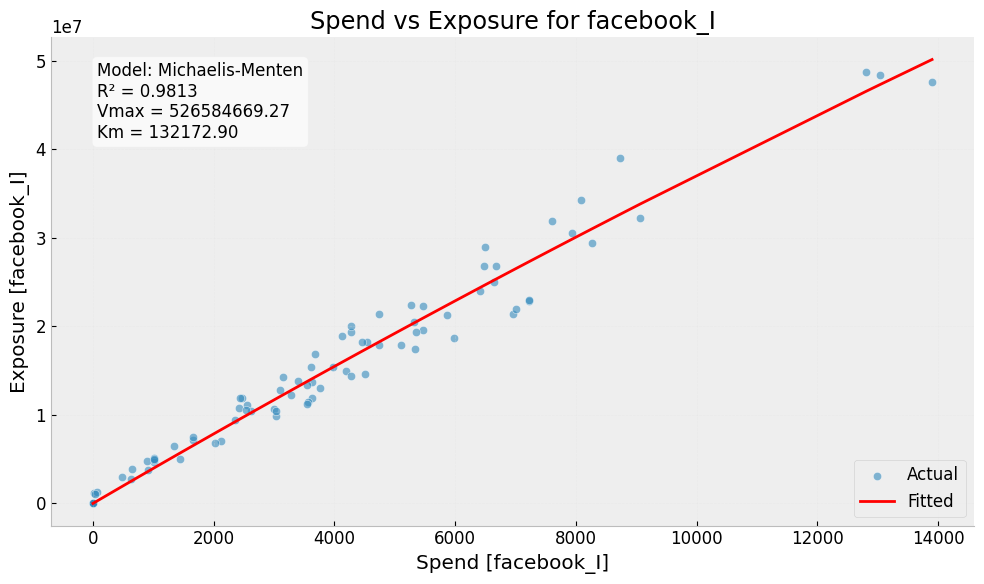

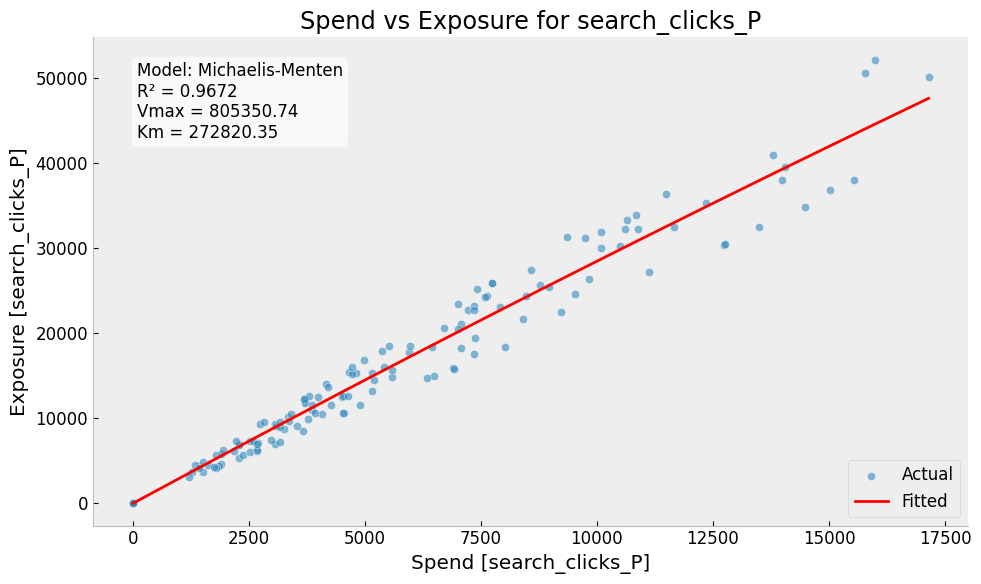

FeaturizedMMMData(dt_mod=            ds       dep_var         trend        season       holiday  \
0   2015-11-23  2.754372e+06  1.716264e+06  1.133548e+06       0.00000   
1   2015-11-30  2.584277e+06  1.717329e+06  8.990713e+05       0.00000   
2   2015-12-07  2.547387e+06  1.718393e+06  7.075011e+05       0.00000   
3   2015-12-14  2.875220e+06  1.719458e+06  6.933337e+05       0.00000   
4   2015-12-21  2.215953e+06  1.720523e+06  8.031644e+05  483714.32256   
..         ...           ...           ...           ...           ...   
203 2019-10-14  2.456240e+06  1.743483e+06  7.429261e+05       0.00000   
204 2019-10-21  2.182825e+06  1.742720e+06  7.979784e+05       0.00000   
205 2019-10-28  2.377707e+06  1.741957e+06  8.621816e+05       0.00000   
206 2019-11-04  2.732825e+06  1.741194e+06  1.003188e+06       0.00000   
207 2019-11-11  2.767788e+06  1.740432e+06  1.171096e+06       0.00000   

     competitor_sales_B events          tv_S          ooh_S       print_S  \
0        

In [5]:
%matplotlib inline
robyn.feature_engineering()

## 3. Run Robyn Model

After initialization, we can run the Robyn model.

INFO: Training models
2024-11-18 16:15:16,485 - robyn.robyn - INFO - Training models
2024-11-18 16:15:16,486 - robyn.modeling.base_model_executor - INFO - Initializing BaseModelExecutor
2024-11-18 16:15:16,487 - robyn.modeling.model_executor - INFO - Starting model execution with model_name=Models.RIDGE
2024-11-18 16:15:16,487 - robyn.modeling.base_model_executor - INFO - Input validation successful
2024-11-18 16:15:16,487 - robyn.modeling.base_model_executor - INFO - Preparing hyperparameters
2024-11-18 16:15:16,488 - robyn.modeling.base_model_executor - INFO - Completed hyperparameter preparation with 20 parameters to optimize
2024-11-18 16:15:16,488 - robyn.modeling.model_executor - INFO - Initializing Ridge model builder
2024-11-18 16:15:16,488 - robyn.modeling.model_executor - INFO - Building models with configured parameters
2024-11-18 16:15:16,489 - robyn.modeling.ridge_model_builder - INFO - Collecting hyperparameters for optimization...
Running trial 1 of total 5 trials: 100%|

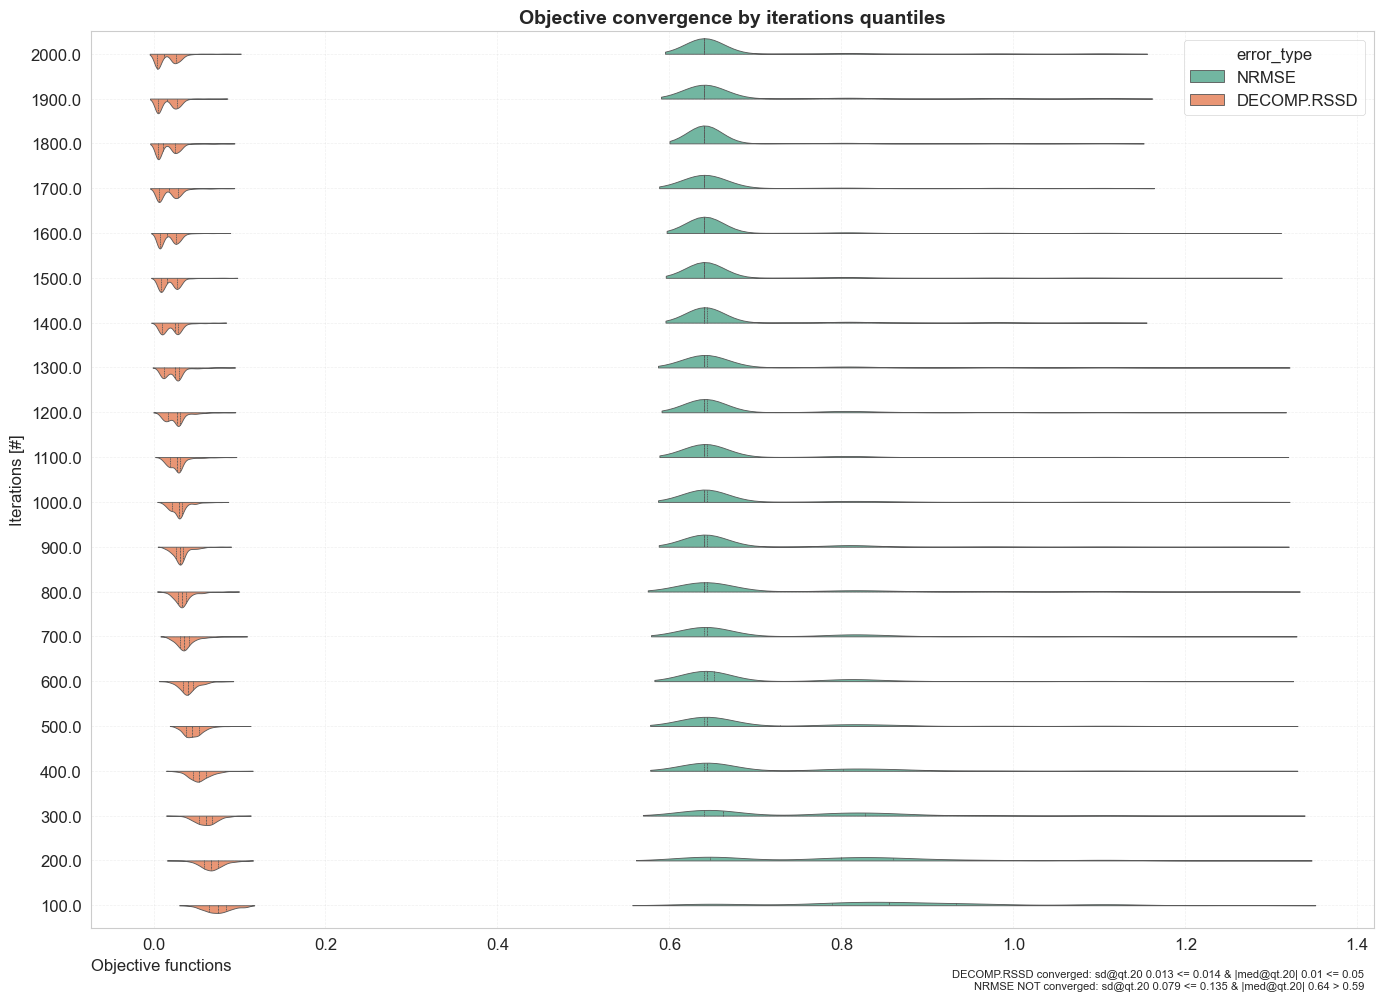

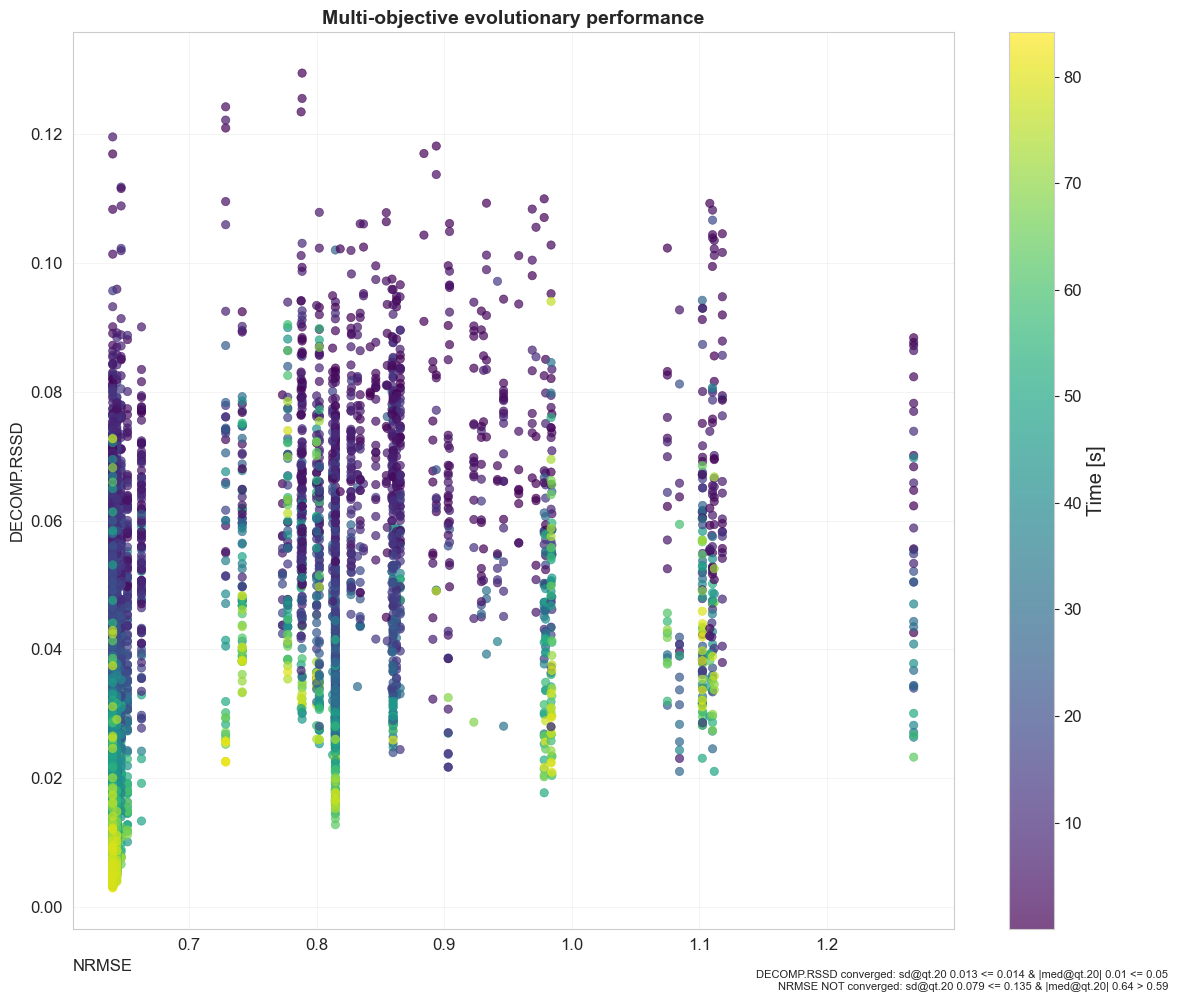

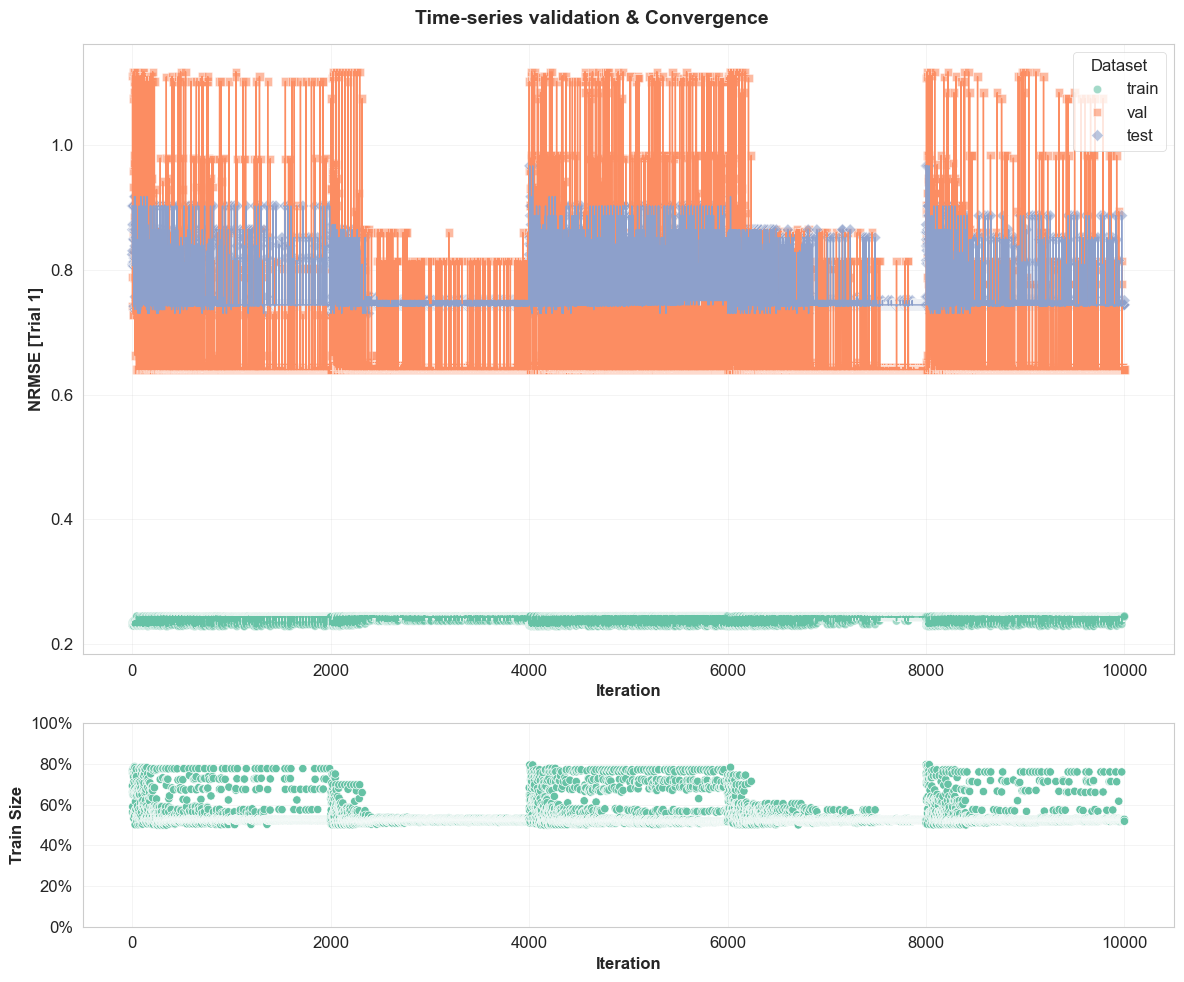

In [6]:
%matplotlib inline
from robyn.modeling.entities.enums import Models, NevergradAlgorithm
from robyn.modeling.entities.modelrun_trials_config import TrialsConfig


trials_config = TrialsConfig(iterations=2000, trials=5)

# Run the model
robyn.train_models(trials_config=trials_config,
                    ts_validation=True,  # changed from True to False -> deacitvate
                    add_penalty_factor=False,
                    cores=8,
                    nevergrad_algo=NevergradAlgorithm.TWO_POINTS_DE,
                    model_name=Models.RIDGE,
                )

## Evaluate Models

In [7]:
%matplotlib inline

from robyn.modeling.clustering.clustering_config import ClusterBy, ClusteringConfig

robyn.evaluate_models(cluster_config=None)

# configs = ClusteringConfig(
#     dep_var_type= DependentVarType(mmm_data.mmmdata_spec.dep_var_type),
#     cluster_by = ClusterBy.HYPERPARAMETERS,
#     max_clusters = 10,
#     min_clusters = 3,
#     weights=[1.0, 1.0, 1.0]
# )
# robyn.evaluate_models(cluster_config=configs)

INFO: Evaluating models
2024-11-18 16:22:08,672 - robyn.robyn - INFO - Evaluating models
2024-11-18 16:22:08 [INFO] Starting Pareto optimization
2024-11-18 16:22:08 [INFO] Starting model data aggregation
2024-11-18 16:22:08 [INFO] Computing Pareto fronts
2024-11-18 16:22:08 [INFO] Pareto front computation completed
2024-11-18 16:22:08 [INFO] Preparing Pareto data
2024-11-18 16:22:08 [INFO] Number of Pareto-optimal solutions found: 8351
2024-11-18 16:22:08 [INFO] Selected 5 Pareto-fronts containing 108 candidates
2024-11-18 16:22:08 [INFO] Filtering data for selected Pareto fronts...
2024-11-18 16:22:08 [INFO] Calculating response curves for 540 models' media variables...
2024-11-18 16:22:08,918 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:08,919 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with siz

==== Preparing Pareto Data Debug Outputs ====
Result Hyp Param Columns:  Index(['facebook_S_thetas', 'facebook_S_alphas', 'facebook_S_gammas',
       'print_S_thetas', 'print_S_alphas', 'print_S_gammas', 'tv_S_thetas',
       'tv_S_alphas', 'tv_S_gammas', 'search_S_thetas', 'search_S_alphas',
       'search_S_gammas', 'ooh_S_thetas', 'ooh_S_alphas', 'ooh_S_gammas',
       'newsletter_thetas', 'newsletter_alphas', 'newsletter_gammas', 'lambda',
       'train_size', 'sol_id', 'Elapsed', 'ElapsedAccum', 'pos', 'trial',
       'rsq_train', 'rsq_val', 'rsq_test', 'nrmse', 'nrmse_train', 'nrmse_val',
       'nrmse_test', 'decomp.rssd', 'mape', 'lambda_hp', 'lambda_max',
       'lambda_min_ratio', 'iterNG', 'iterPar', 'iterations', 'coef',
       'mape.qt10', 'robynPareto', 'error_score'],
      dtype='object')
Result Hyp Param Shape:  (10000, 44)
Result Hyp Param Sample:     facebook_S_thetas  facebook_S_alphas  facebook_S_gammas  print_S_thetas  \
0           0.283596           1.843564    

2024-11-18 16:22:08,931 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:   0%|          | 0/540 [00:00<?, ?it/s]2024-11-18 16:22:08,941 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0


Error processing row for sol_id 1_1557_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1557_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1557_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0


2024-11-18 16:22:08,958 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:08,967 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:08,971 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:08,987 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,005 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,016 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,027 - ro

Error processing row for sol_id 1_1647_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1557_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1647_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1647_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1647_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1647_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1677_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1677_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1677_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1677_1, rn facebook_S: index 0 is out of bounds for a

2024-11-18 16:22:09,154 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,165 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0


Error processing row for sol_id 1_1791_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1791_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1791_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0


2024-11-18 16:22:09,176 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:   4%|▍         | 24/540 [00:00<00:05, 102.87it/s]2024-11-18 16:22:09,186 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,197 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,207 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,217 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,228 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 1_1791_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1794_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1794_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1794_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1794_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1794_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1797_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1797_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1797_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1797_1, rn facebook_S: index 0 is out of bounds for a

2024-11-18 16:22:09,366 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,376 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0


Error processing row for sol_id 1_1825_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1825_1, rn print_S: index 0 is out of bounds for axis 0 with size 0


2024-11-18 16:22:09,387 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,398 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:   8%|▊         | 45/540 [00:00<00:05, 97.19it/s]2024-11-18 16:22:09,409 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,419 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,430 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,441 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is 

Error processing row for sol_id 1_1825_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1825_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1827_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1827_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1827_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1827_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1827_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1830_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1830_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1830_1, rn print_S: index 0 is out of bounds for a

2024-11-18 16:22:09,578 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,589 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0


Error processing row for sol_id 1_1854_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1854_1, rn print_S: index 0 is out of bounds for axis 0 with size 0


2024-11-18 16:22:09,600 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,610 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  12%|█▏        | 65/540 [00:00<00:04, 95.48it/s]2024-11-18 16:22:09,620 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,631 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,641 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,652 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is 

Error processing row for sol_id 1_1854_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1854_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1863_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1863_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1863_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1863_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1863_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1866_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1866_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1866_1, rn print_S: index 0 is out of bounds for a

2024-11-18 16:22:09,790 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,801 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0


Error processing row for sol_id 1_1882_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1882_1, rn print_S: index 0 is out of bounds for axis 0 with size 0


2024-11-18 16:22:09,812 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,823 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  16%|█▌        | 85/540 [00:00<00:04, 94.48it/s]2024-11-18 16:22:09,833 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,844 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,855 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:09,865 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is 

Error processing row for sol_id 1_1882_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1882_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1893_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1893_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1893_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1893_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1893_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1896_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1896_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1896_1, rn print_S: index 0 is out of bounds for a

2024-11-18 16:22:09,993 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,003 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0


Error processing row for sol_id 1_1903_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1903_1, rn print_S: index 0 is out of bounds for axis 0 with size 0


2024-11-18 16:22:10,014 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,025 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  19%|█▉        | 105/540 [00:01<00:04, 93.86it/s]2024-11-18 16:22:10,036 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,046 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,057 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,068 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 1_1903_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1903_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1910_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1910_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1910_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1910_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1910_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1911_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1911_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1911_1, rn print_S: index 0 is out of bounds for a

2024-11-18 16:22:10,209 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,220 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0


Error processing row for sol_id 1_1923_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1923_1, rn print_S: index 0 is out of bounds for axis 0 with size 0


2024-11-18 16:22:10,230 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,241 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,251 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  23%|██▎       | 125/540 [00:01<00:04, 93.57it/s]2024-11-18 16:22:10,262 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,273 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,283 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 1_1923_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1923_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1924_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1924_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1924_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1924_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1924_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1926_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1926_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1926_1, rn print_S: index 0 is out of bounds for a

2024-11-18 16:22:10,424 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,435 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0


Error processing row for sol_id 1_1941_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0


2024-11-18 16:22:10,446 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,456 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,467 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  27%|██▋       | 145/540 [00:01<00:04, 93.74it/s]2024-11-18 16:22:10,477 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,488 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,499 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 1_1941_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1941_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1941_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1945_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1945_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1945_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1945_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1945_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1968_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1968_1, rn ooh_S: index 0 is out of bounds for a

2024-11-18 16:22:10,645 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0


Error processing row for sol_id 1_1971_1, rn print_S: index 0 is out of bounds for axis 0 with size 0


2024-11-18 16:22:10,656 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,666 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,676 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  31%|███       | 165/540 [00:01<00:03, 93.83it/s]2024-11-18 16:22:10,687 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,697 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,708 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 1_1971_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1971_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1973_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1973_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1973_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1973_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1973_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1982_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1982_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1982_1, rn print_S: index 0 is out of bounds for a

2024-11-18 16:22:10,866 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,876 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,887 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  34%|███▍      | 185/540 [00:01<00:03, 95.10it/s]2024-11-18 16:22:10,897 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,907 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:10,918 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 1_1987_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1987_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1988_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1988_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1988_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1988_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1988_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1990_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1990_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1990_1, rn print_S: index 0 is out of bounds for a

2024-11-18 16:22:11,076 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,088 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,100 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  38%|███▊      | 205/540 [00:02<00:03, 92.01it/s]2024-11-18 16:22:11,112 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,125 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,136 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 1_1996_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1996_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1996_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1998_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1998_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1998_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1998_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 1_1998_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_296_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_296_1, rn ooh_S: index 0 is out of bounds for axi

2024-11-18 16:22:11,286 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,297 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,308 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  42%|████▏     | 225/540 [00:02<00:03, 93.06it/s]2024-11-18 16:22:11,319 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,330 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,351 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 2_1031_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1031_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1031_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1031_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1047_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1047_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1047_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1047_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1047_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1050_1, rn tv_S: index 0 is out of bounds for a

2024-11-18 16:22:11,504 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,514 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,526 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,536 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  45%|████▌     | 245/540 [00:02<00:03, 91.59it/s]2024-11-18 16:22:11,547 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,558 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 2_1351_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1351_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1351_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1351_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1398_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1398_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1398_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1398_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1398_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1433_1, rn tv_S: index 0 is out of bounds for a

2024-11-18 16:22:11,708 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,719 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,730 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,740 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,751 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  49%|████▉     | 265/540 [00:02<00:02, 92.52it/s]2024-11-18 16:22:11,762 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 2_1472_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1472_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1472_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1472_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1491_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1491_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1491_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1491_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1491_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1510_1, rn tv_S: index 0 is out of bounds for a

2024-11-18 16:22:11,920 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,930 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,941 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,952 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:11,963 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  53%|█████▎    | 286/540 [00:03<00:02, 94.09it/s]2024-11-18 16:22:11,973 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 2_1557_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1557_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1557_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1557_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1570_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1570_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1570_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1570_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1570_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1617_1, rn tv_S: index 0 is out of bounds for a

2024-11-18 16:22:12,137 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,148 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,159 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,171 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,182 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  57%|█████▋    | 306/540 [00:03<00:02, 92.80it/s]2024-11-18 16:22:12,193 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 2_1680_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1680_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1680_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1680_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1736_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1736_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1736_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1736_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1736_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1740_1, rn tv_S: index 0 is out of bounds for a

2024-11-18 16:22:12,352 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,363 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,374 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,384 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,395 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  60%|██████    | 326/540 [00:03<00:02, 93.55it/s]2024-11-18 16:22:12,406 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 2_1786_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1786_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1786_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1786_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1818_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1818_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1818_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1818_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1818_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1836_1, rn tv_S: index 0 is out of bounds for a

2024-11-18 16:22:12,564 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,575 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,585 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,596 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,607 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  64%|██████▍   | 346/540 [00:03<00:02, 94.19it/s]2024-11-18 16:22:12,617 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 2_1857_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1857_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1857_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1857_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1872_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1872_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1872_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1872_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1872_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1890_1, rn tv_S: index 0 is out of bounds for a

2024-11-18 16:22:12,776 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,787 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,797 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,808 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,818 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:12,829 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  68%|██████

Error processing row for sol_id 2_1905_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1905_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1905_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1905_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1930_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1930_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1930_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1930_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1930_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 2_1977_1, rn tv_S: index 0 is out of bounds for a

2024-11-18 16:22:12,997 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,008 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,018 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,029 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,040 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  71%|███████▏  | 386/540 [00:04<00:01, 94.43it/s]2024-11-18 16:22:13,050 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 3_868_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_868_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_868_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_868_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_908_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_908_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_908_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_908_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_908_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_928_1, rn tv_S: index 0 is out of bounds for axis 0 with

2024-11-18 16:22:13,202 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,213 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,226 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,237 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,249 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,260 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  75%|██████

Error processing row for sol_id 3_1249_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_1249_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_1249_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_1249_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_1249_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_1955_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_1955_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_1955_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_1955_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 3_1955_1, rn search_S: index 0 is out of bounds for a

2024-11-18 16:22:13,421 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,432 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,442 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,453 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,464 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,474 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
Processing rows:  79%|██████

Error processing row for sol_id 4_1304_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1304_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1304_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1304_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1304_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1320_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1320_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1320_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1320_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1320_1, rn search_S: index 0 is out of bounds for a

2024-11-18 16:22:13,633 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,644 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,655 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,665 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,676 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,686 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,697 - ro

Error processing row for sol_id 4_1394_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1394_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1394_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1394_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1394_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1424_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1424_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1424_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1424_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 4_1424_1, rn search_S: index 0 is out of bounds for a

2024-11-18 16:22:13,844 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,858 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,870 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,882 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,894 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,906 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:13,917 - ro

Error processing row for sol_id 5_646_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_646_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_658_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_658_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_658_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_658_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_658_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_912_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_912_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_912_1, rn print_S: index 0 is out of bounds for axis 0 with

2024-11-18 16:22:14,061 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,073 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,083 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,094 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,105 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,116 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,127 - ro

Error processing row for sol_id 5_1019_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1019_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1027_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1027_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1027_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1027_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1027_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1081_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1081_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1081_1, rn print_S: index 0 is out of bounds for a

2024-11-18 16:22:14,268 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,279 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,290 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,301 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,312 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,323 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,334 - ro

Error processing row for sol_id 5_1198_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1198_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1198_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1210_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1210_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1210_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1210_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1210_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1231_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0


Processing rows:  94%|█████████▎| 506/540 [00:05<00:00, 58.08it/s]2024-11-18 16:22:14,514 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,530 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,597 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,609 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,620 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,630 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is

Error processing row for sol_id 5_1231_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1231_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1231_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1231_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1291_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1291_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1291_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1291_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1291_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1683_1, rn tv_S: index 0 is out of bounds for ax

2024-11-18 16:22:14,798 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,810 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,821 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,832 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,843 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,854 - robyn.modeling.pareto.response_curve - ERROR - Error calculating final response values: index 0 is out of bounds for axis 0 with size 0
2024-11-18 16:22:14,865 - ro

Error processing row for sol_id 5_1833_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1833_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1833_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1833_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1833_1, rn search_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1909_1, rn tv_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1909_1, rn ooh_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1909_1, rn print_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1909_1, rn facebook_S: index 0 is out of bounds for axis 0 with size 0
Error processing row for sol_id 5_1909_1, rn search_S: index 0 is out of bounds for a

Processing Solutions: 0solution [00:00, ?solution/s]
2024-11-18 16:22:14 [INFO] Processing Pareto front 2
2024-11-18 16:22:14 [INFO] Pareto-Front: 2 [0 models]
Processing Solutions: 0solution [00:00, ?solution/s]
2024-11-18 16:22:14 [INFO] Processing Pareto front 3
2024-11-18 16:22:14 [INFO] Pareto-Front: 3 [0 models]
Processing Solutions: 0solution [00:00, ?solution/s]
2024-11-18 16:22:14 [INFO] Processing Pareto front 4
2024-11-18 16:22:14 [INFO] Pareto-Front: 4 [0 models]
Processing Solutions: 0solution [00:00, ?solution/s]
2024-11-18 16:22:14 [INFO] Processing Pareto front 5
2024-11-18 16:22:14 [INFO] Pareto-Front: 5 [0 models]
Processing Solutions: 0solution [00:00, ?solution/s]
2024-11-18 16:22:14 [INFO] Pareto optimization completed successfully
2024-11-18 16:22:14,960 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-18 16:22:14,961 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
INFO: Model

## 4. Budget Allocation

Finally, let's perform budget allocation using the trained model.

This notebook demonstrates the basic workflow of using Robyn for Marketing Mix Modeling. In a real-world scenario, you would need to replace the synthetic data with your actual marketing data and adjust the parameters accordingly.

Remember to explore the full capabilities of Robyn, including model evaluation, visualization, and interpretation of results, which are beyond the scope of this basic demonstration.

INFO: Optimizing budget allocation
2024-11-18 16:22:14,968 - robyn.robyn - INFO - Optimizing budget allocation
2024-11-18 16:22:14,970 - robyn.allocator.budget_allocator - INFO - Initializing BudgetAllocator
2024-11-18 16:22:14,971 - robyn.allocator.media_response - INFO - Initializing MediaResponseParamsCalculator
2024-11-18 16:22:14,971 - robyn.allocator.allocation_optimizer - INFO - Initializing AllocationOptimizer
2024-11-18 16:22:14,971 - robyn.allocator.media_response - INFO - Starting media response parameters calculation for model 1_1_1
2024-11-18 16:22:14,974 - robyn.allocator.media_response - WARNING - No coefficient data found for facebook_S, using default coefficient of 1.0
2024-11-18 16:22:14,975 - robyn.allocator.media_response - WARNING - No coefficient data found for ooh_S, using default coefficient of 1.0
2024-11-18 16:22:14,975 - robyn.allocator.media_response - WARNING - No coefficient data found for print_S, using default coefficient of 1.0
2024-11-18 16:22:14,976 -

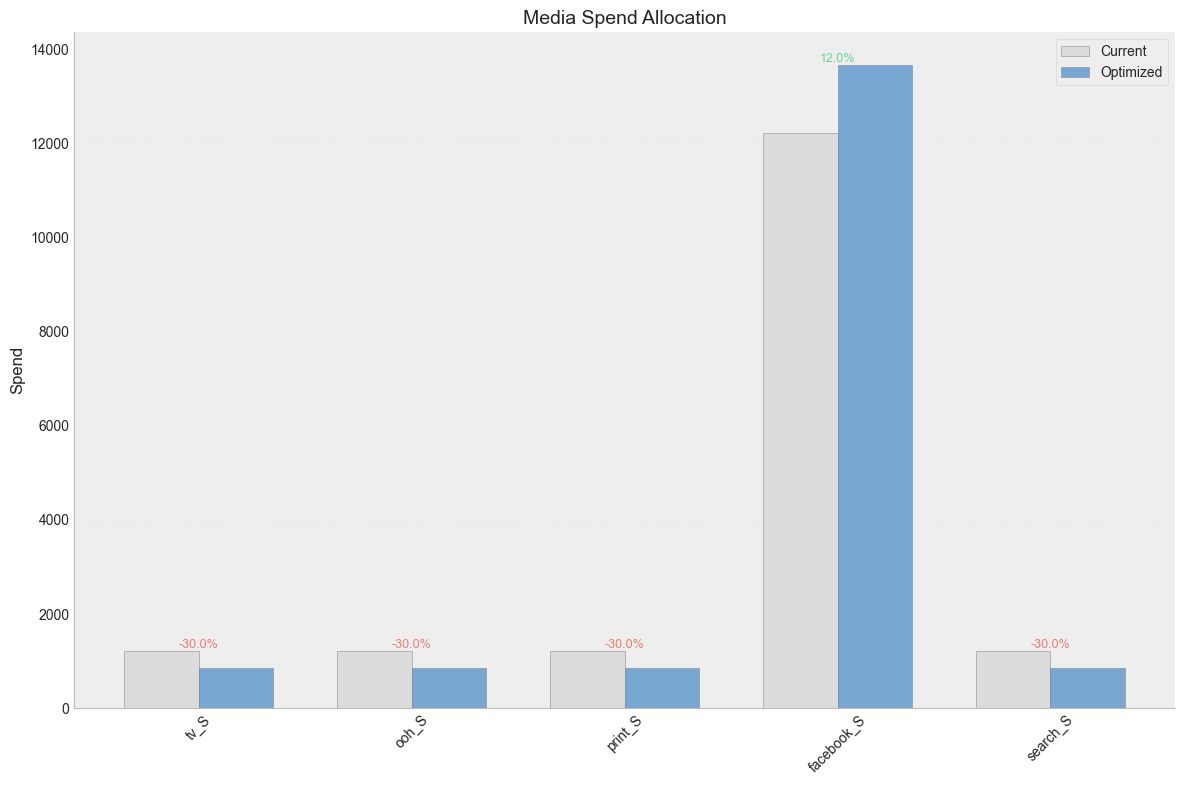

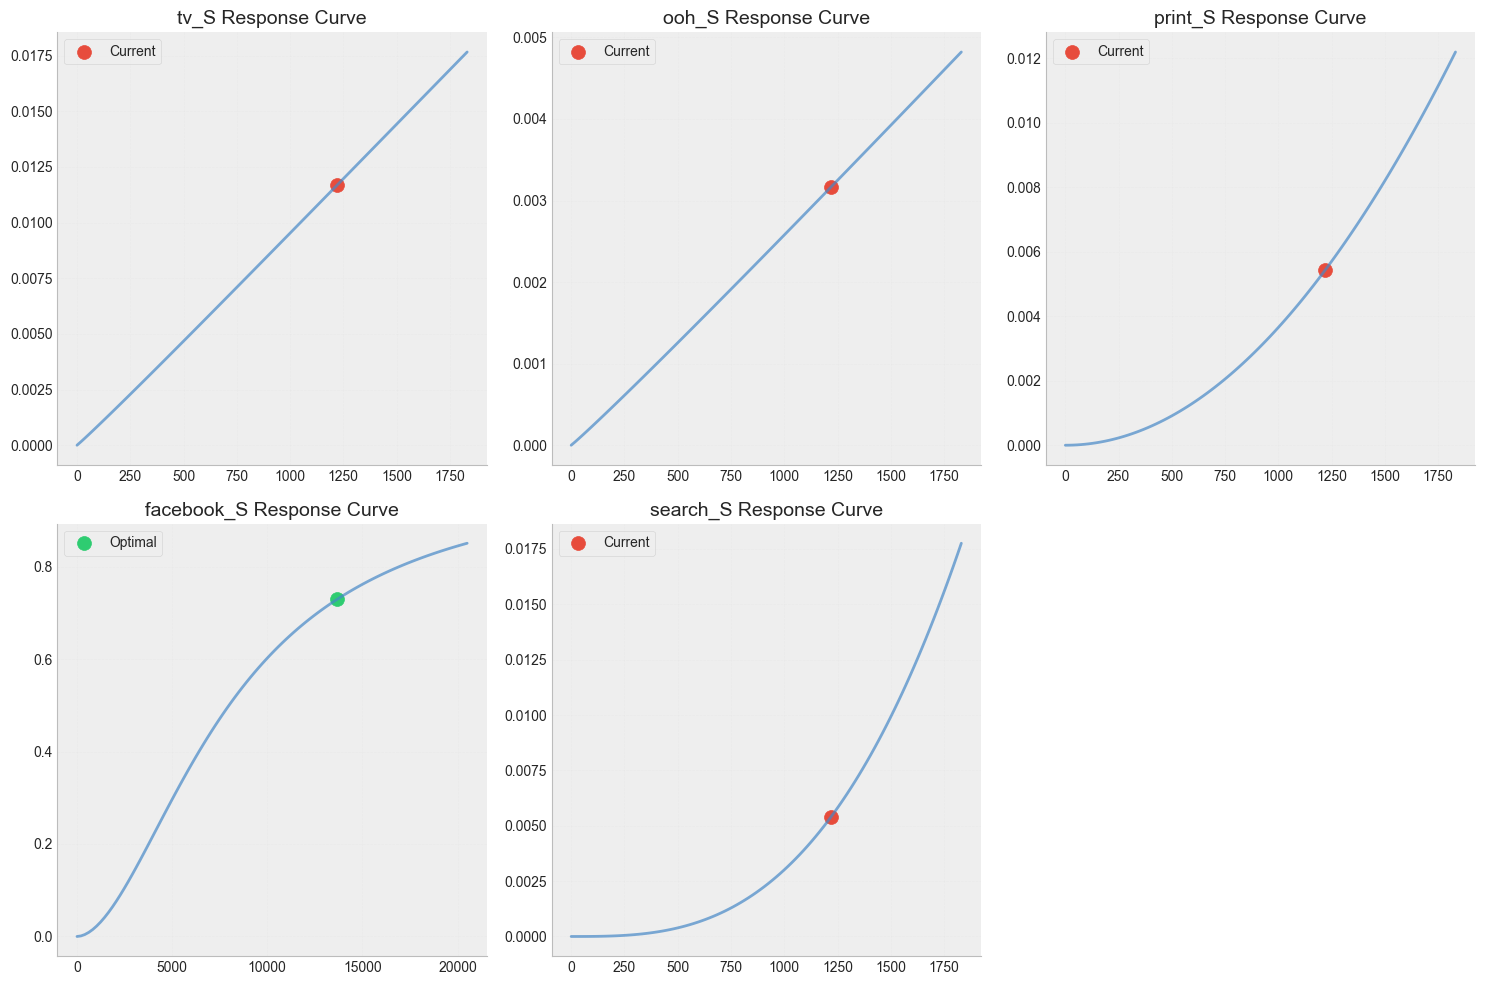

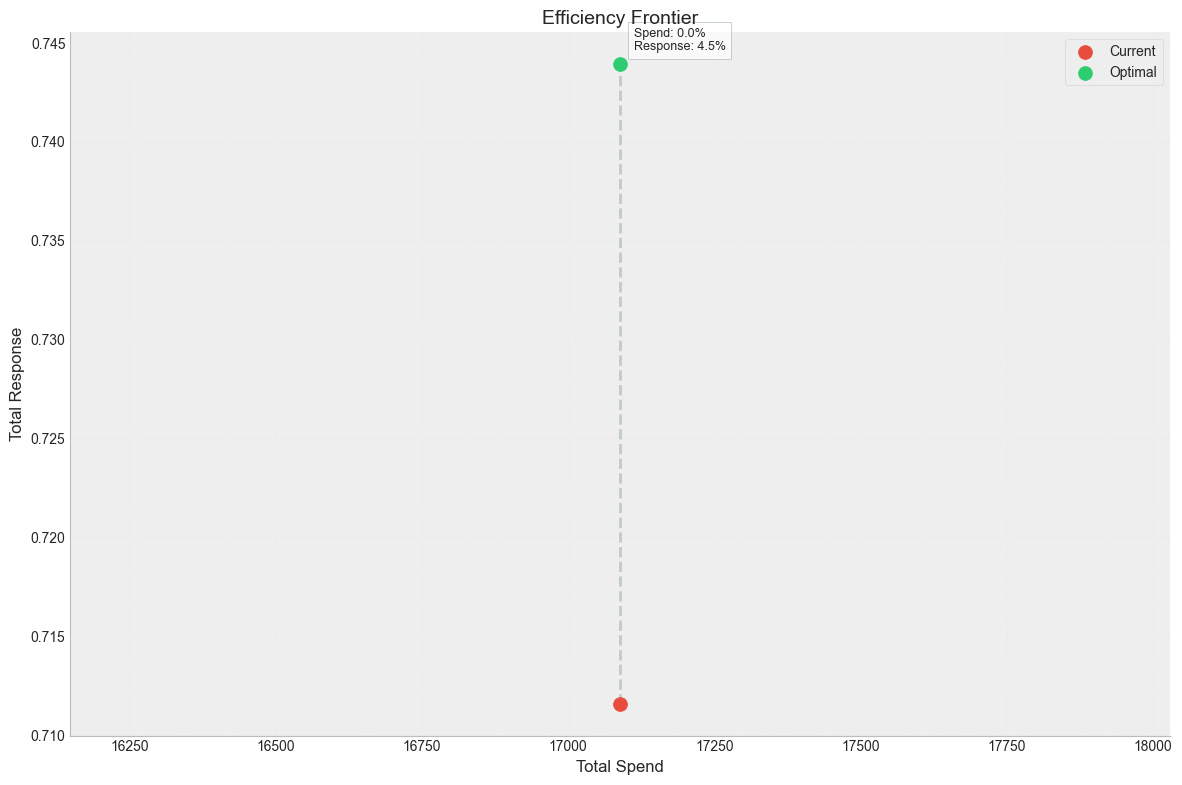

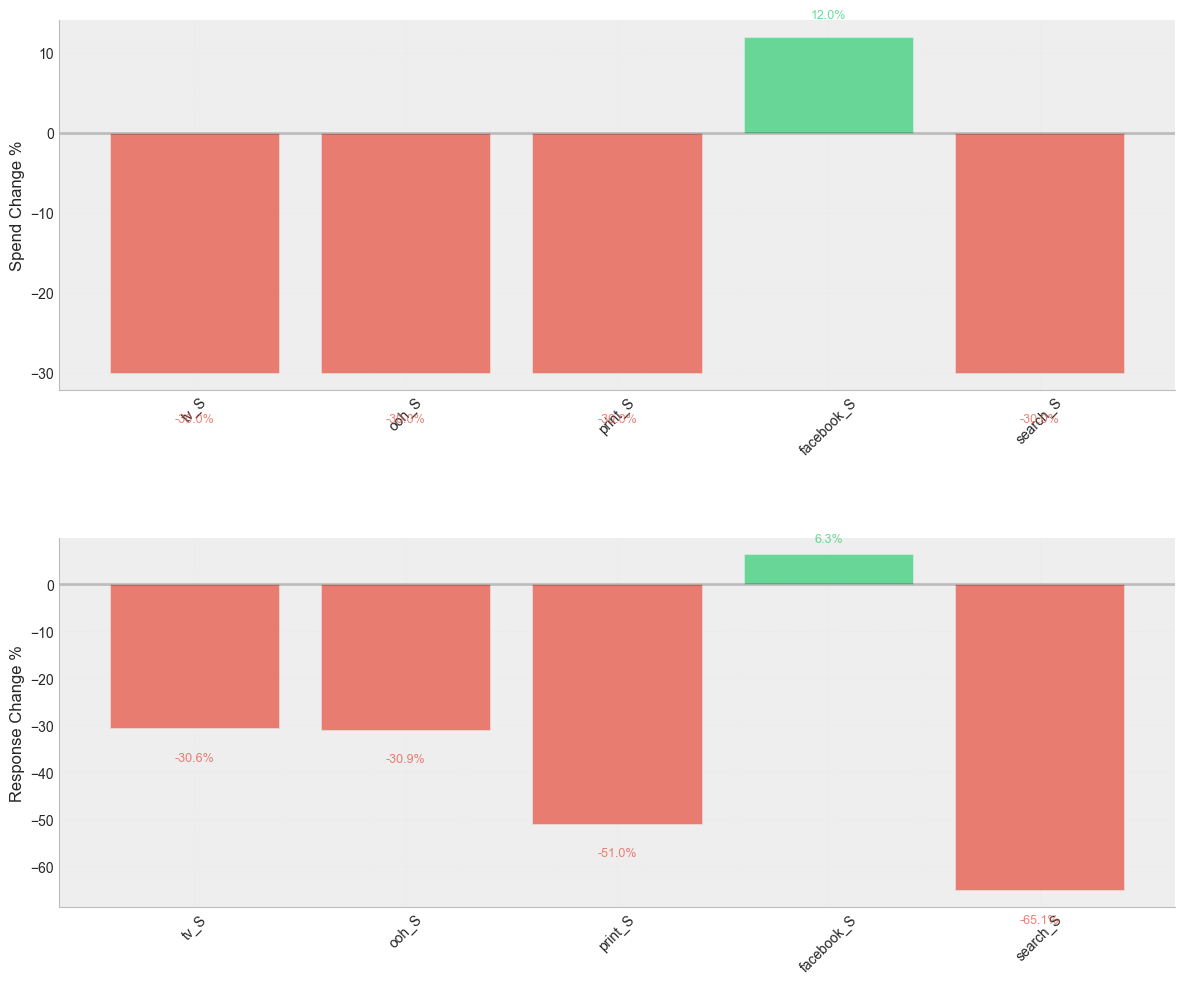

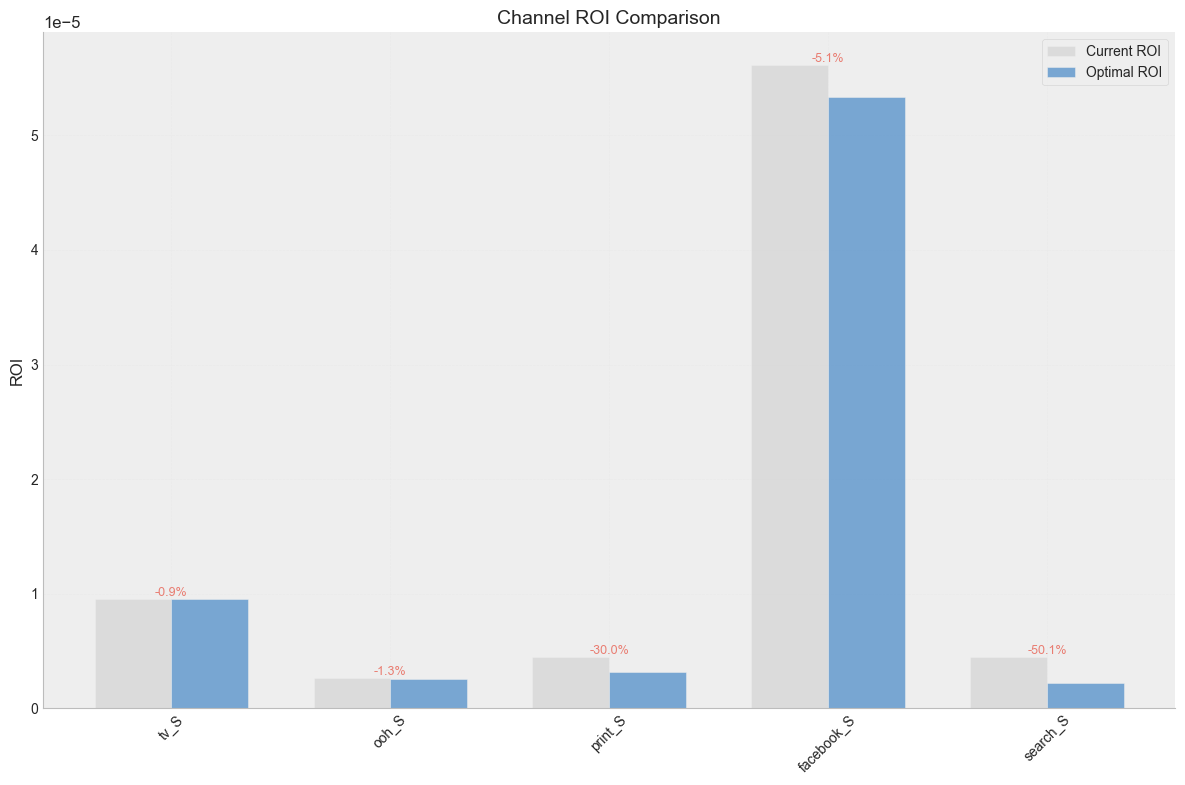

INFO: Budget optimization complete
2024-11-18 16:22:16,157 - robyn.robyn - INFO - Budget optimization complete


AllocationResult(
Total Current Spend: $17,088.90
Total Optimal Spend: $17,088.90
Spend Lift: +0.0%
Response Lift: +4.5%)


In [8]:
%matplotlib inline
from robyn.allocator.entities.allocation_constraints import AllocationConstraints
from robyn.allocator.entities.allocation_config import AllocationConfig
from robyn.allocator.entities.enums import OptimizationScenario, ConstrMode

# Define allocation constraints
channel_constraints = AllocationConstraints(
    channel_constr_low={
        "tv_S": 0.7,  # -30% from base
        "ooh_S": 0.7,
        "print_S": 0.7,
        "facebook_S": 0.7,
        "search_S": 0.7,
    },
    channel_constr_up={
        "tv_S": 1.2,  # +20% from base
        "ooh_S": 1.5,  # +50% from base
        "print_S": 1.5,
        "facebook_S": 1.5,
        "search_S": 1.5,
    },
    channel_constr_multiplier=3.0,
)
# Configure allocation scenario
allocation_config = AllocationConfig(
    scenario=OptimizationScenario.MAX_RESPONSE,
    constraints=channel_constraints,
    date_range="last",  # Use last period as initial
    total_budget=None,  # Use historical budget
    maxeval=100000,
    optim_algo="SLSQP_AUGLAG",
    constr_mode=ConstrMode.EQUALITY,
)

# Call the budget_allocator method
allocation_result = robyn.optimize_budget(
    allocation_config=allocation_config,
    select_model=None,
)
# Display the allocation result
print(allocation_result)

## Robyn One Pager Report

In [9]:
# robyn.generate_one_pager()